# Building a wordcloud based on one year of bulletins

## Créer un fichier contenant les bulletins d'une année donnée

In [1]:
year = 1871

In [2]:
from os import listdir
from os.path import isfile, join

data_path = '/Volumes/Extreme SSD/Temp/TPTraitAuto/data'
txt_path = '/Volumes/Extreme SSD/Temp/TPTraitAuto/data/txt'

txts = [f for f in listdir(txt_path) if isfile(join(txt_path, f)) and str(year) in f]

In [3]:
content_list = []
for txt in txts:
    with open(f'{txt_path}/{txt}', encoding='utf-8') as f:
        content_list.append(f.read())

with open(f'{data_path}/{year}.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Enlever les stopwords, les mots courts et non alphabétiques et stocker le résultat dans un nouveau fichier

In [4]:
from filtering_neloial import filtering

filtering(data_path, year)

## Créer le word cloud

In [5]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', f'{data_path}/{year}_keywords.txt',
    '--imagefile', f'{data_path}/{year}.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '/Volumes/Extreme SSD/Temp/TPTraitAuto/data/1871_keywords.txt', '--imagefile', '/Volumes/Extreme SSD/Temp/TPTraitAuto/data/1871.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

## Afficher le word cloud

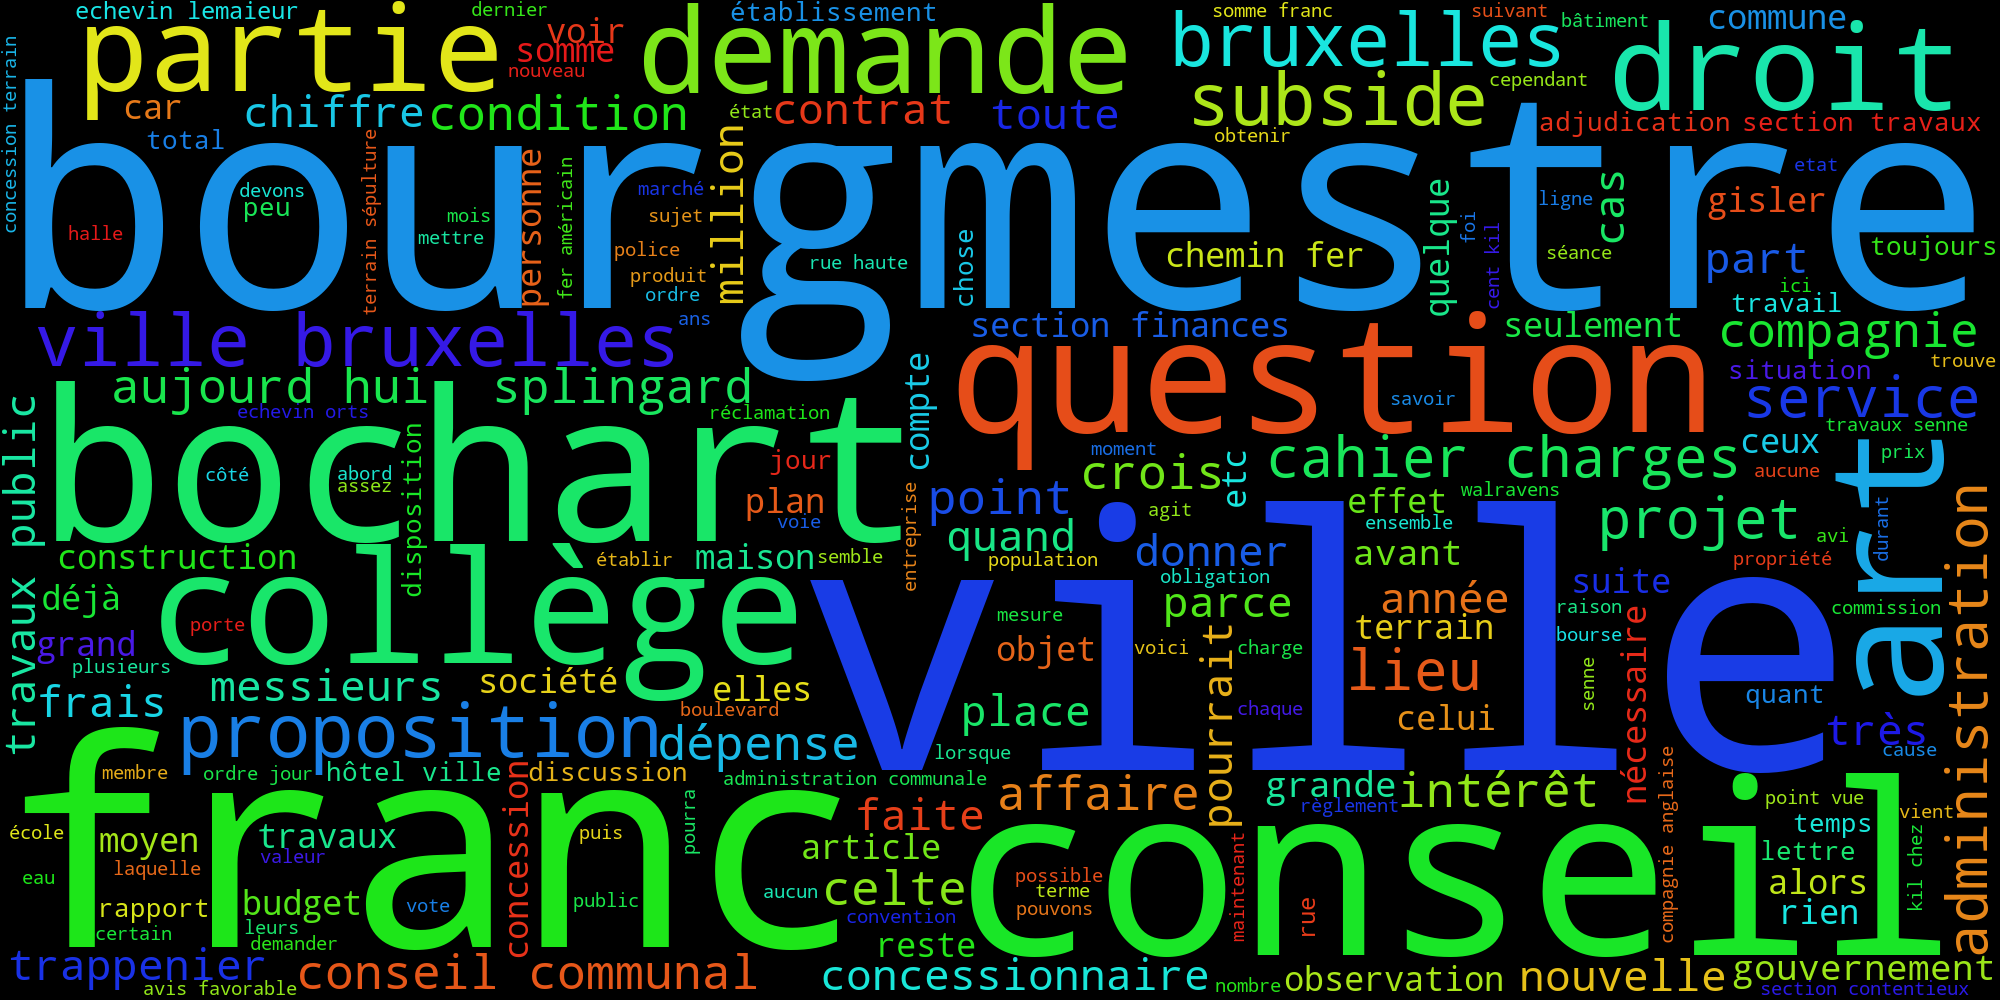

In [6]:
from IPython.display import Image

Image(filename=f'{data_path}/{year}.png')